In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as  hub
import tensorflow_datasets as tfds
import  numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
Classifier = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
image_res = 299

In [0]:
model = tf.keras.Sequential([hub.KerasLayer(Classifier, input_shape=(image_res, image_res, 3)),
                             layers.Dense(7)
                            ])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [0]:
train_image_generator      = ImageDataGenerator(rescale=1./255,
                                                rotation_range=30,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                width_shift_range=0.15,
                                                height_shift_range=0.15
                                               )  
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

In [0]:
IMG_SHAPE = 299

In [0]:
#train_dir = '../data/faces/train/'
#val_dir = '../data/faces/val/'
train_dir = '/content/drive/My Drive/faces/train/'
val_dir = '/content/drive/My Drive/faces/val/'

In [71]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='sparse')

Found 155 images belonging to 7 classes.


In [72]:
print(train_data_gen.class_indices)

{'Aditya Solanki': 0, 'Ben Afflek': 1, 'Elton John': 2, 'Jerry Seinfeld': 3, 'Madonna': 4, 'Mindy Kaling': 5, 'Unknown': 6}


In [73]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=20,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='sparse')

Found 35 images belonging to 7 classes.


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [78]:
EPOCHS = 70
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(155 / float(100))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(35 / float(20)))
)

Epoch 1/70
2/2 [==============================] - 4s 2s/step - loss: 2.1351 - accuracy: 0.2645 - val_loss: 1.8264 - val_accuracy: 0.2286
Epoch 2/70
2/2 [==============================] - 2s 782ms/step - loss: 1.7237 - accuracy: 0.2903 - val_loss: 1.6830 - val_accuracy: 0.2571
Epoch 3/70
2/2 [==============================] - 2s 796ms/step - loss: 1.6235 - accuracy: 0.3355 - val_loss: 1.4707 - val_accuracy: 0.3714
Epoch 4/70
2/2 [==============================] - 1s 750ms/step - loss: 1.4677 - accuracy: 0.3935 - val_loss: 1.2766 - val_accuracy: 0.4857
Epoch 5/70
2/2 [==============================] - 2s 786ms/step - loss: 1.3340 - accuracy: 0.5032 - val_loss: 1.1618 - val_accuracy: 0.5429
Epoch 6/70
2/2 [==============================] - 2s 777ms/step - loss: 1.2762 - accuracy: 0.5032 - val_loss: 1.0915 - val_accuracy: 0.5714
Epoch 7/70
2/2 [==============================] - 2s 766ms/step - loss: 1.2065 - accuracy: 0.5161 - val_loss: 1.0266 - val_accuracy: 0.6000
Epoch 8/70
2/2 [=======

In [0]:
model.save('face-recogition-colab.h5')

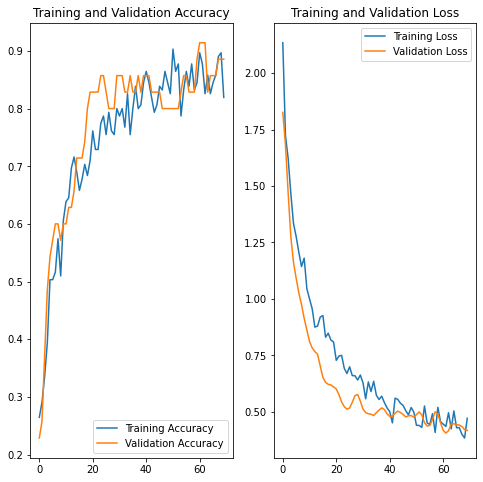

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo-colab.png')
plt.show()

In [81]:
#model = load_model('keras.h5')
model = tf.keras.models.load_model('face-recogition-colab.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 7014      
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________
